In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/EE708/A1.csv')

Answer-6a.

In [3]:
label = 'Classes'
class_counts = data[label].value_counts()
print("Class frequencies: ")
print(class_counts)

Class frequencies: 
Classes
A    151
B    123
C     68
Name: count, dtype: int64


Answer-6b.

In [4]:

print("Data description: ")
data.describe()


Data description: 


,Sample Number,Feature 1,Feature 2,Feature 3,Feature 4
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386
std,98.871128,5.459584,1.974793,14.061714,801.954536
min,1.000000,32.100000,13.100000,172.000000,2700.000000
25%,86.250000,39.225000,15.600000,190.000000,3550.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000
75%,256.750000,48.500000,18.700000,213.000000,4750.000000
max,342.000000,59.600000,21.500000,231.000000,6300.000000


In [5]:
feature = data.select_dtypes(include='number')
if 'Sample Number' in feature.columns:
  feature = feature.drop(columns=['Sample Number'])

Q1 = feature.quantile(0.25)
Q3 = feature.quantile(0.75)
IQR = Q3-Q1
print("Inter quartile range: ")
print(IQR)

Inter quartile range: 
Feature 1       9.275
Feature 2       3.100
Feature 3      23.000
Feature 4    1200.000
dtype: float64


Answer-6c.

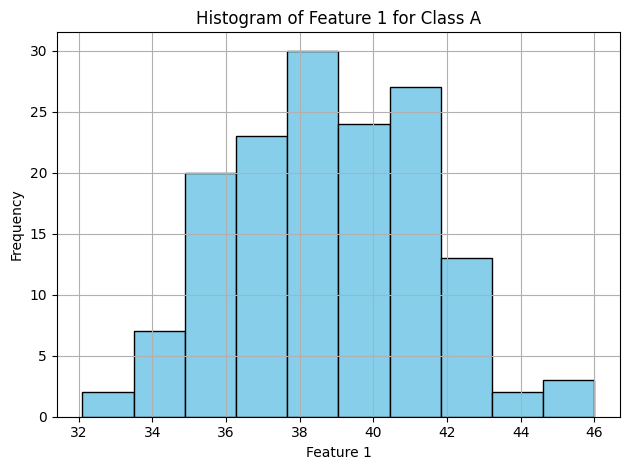

In [6]:
import matplotlib.pyplot as plt
feature_1_class_A = data[data['Classes'] == 'A']['Feature 1']

plt.hist(feature_1_class_A, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Feature 1 for Class A')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()

Answer-6d.

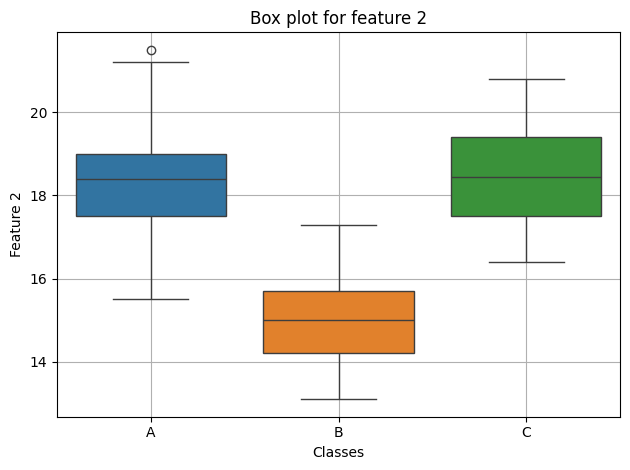

In [7]:
import seaborn as sns

sns.boxplot(data=data,y='Feature 2',x='Classes',hue='Classes')
plt.title('Box plot for feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()

Answer-6e.

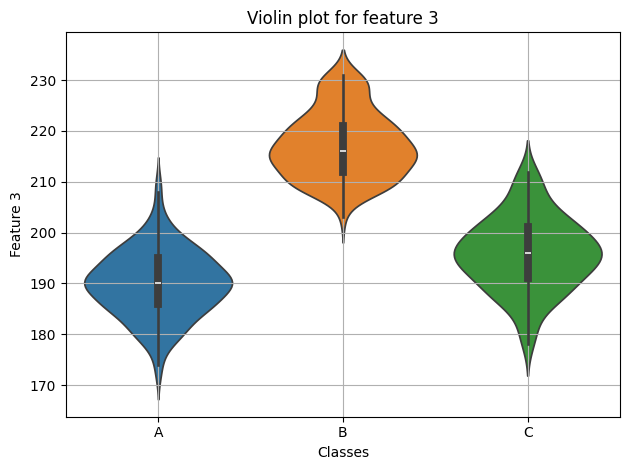

In [8]:
sns.violinplot(data=data,x='Classes',y='Feature 3',hue='Classes')
plt.title('Violin plot for feature 3')
plt.tight_layout()
plt.grid(True)
plt.show()

Answer-6f.

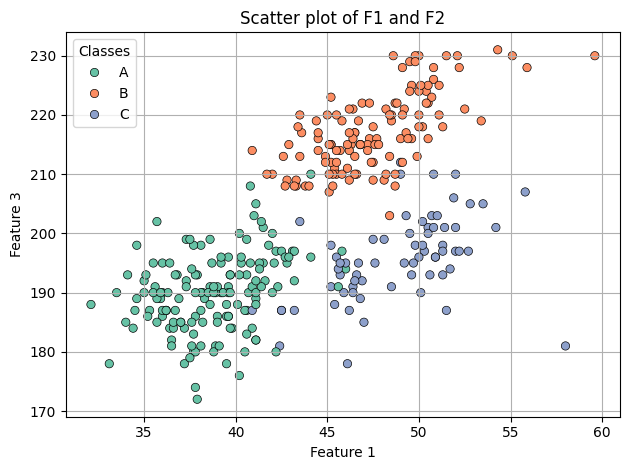

In [9]:
sns.scatterplot(data=data,x='Feature 1',y='Feature 3',hue='Classes',palette='Set2',edgecolor='k')
plt.title('Scatter plot of F1 and F2')
plt.tight_layout()
plt.grid(True)
plt.show()


Answer-6g.

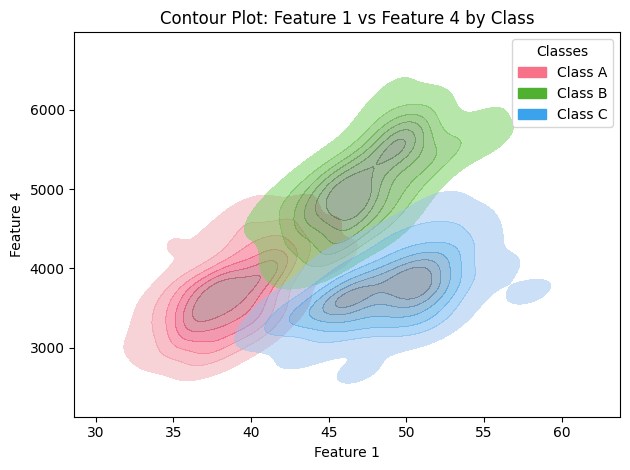

In [46]:
import numpy as np
from matplotlib.patches import Patch

classes = data['Classes'].unique()
colors = sns.color_palette('husl', len(classes))
legend_patches = []

for cls, color in zip(classes, colors):
    subset = data[data['Classes'] == cls]
    sns.kdeplot(
        x=subset['Feature 1'],
        y=subset['Feature 4'],
        levels=7,
        fill=True,
        alpha=0.5,
        color=color
    )
    legend_patches.append(Patch(color=color, label=f'Class {cls}'))

plt.title('Contour Plot: Feature 1 vs Feature 4 by Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 4')
plt.legend(handles=legend_patches, title='Classes')
plt.tight_layout()
plt.show()


Answer-6h.

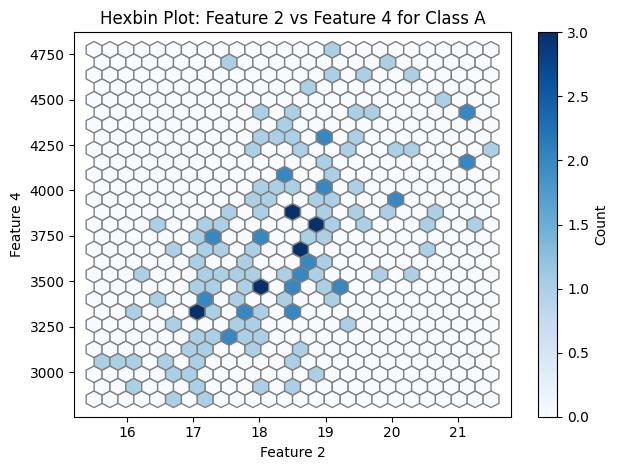

In [56]:
data_A = data[data['Classes'] == 'A']

plt.hexbin(data_A['Feature 2'], data_A['Feature 4'], gridsize=25, cmap='Blues', edgecolors='gray')
plt.xlabel('Feature 2')
plt.ylabel('Feature 4')
plt.title('Hexbin Plot: Feature 2 vs Feature 4 for Class A')
plt.colorbar(label='Count')
plt.tight_layout()
plt.show()

Answer-6i.

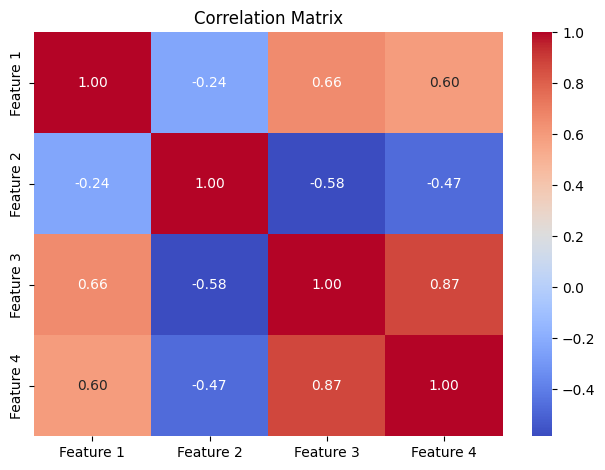

In [67]:
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']
corr_matrix = data[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Answer-6j

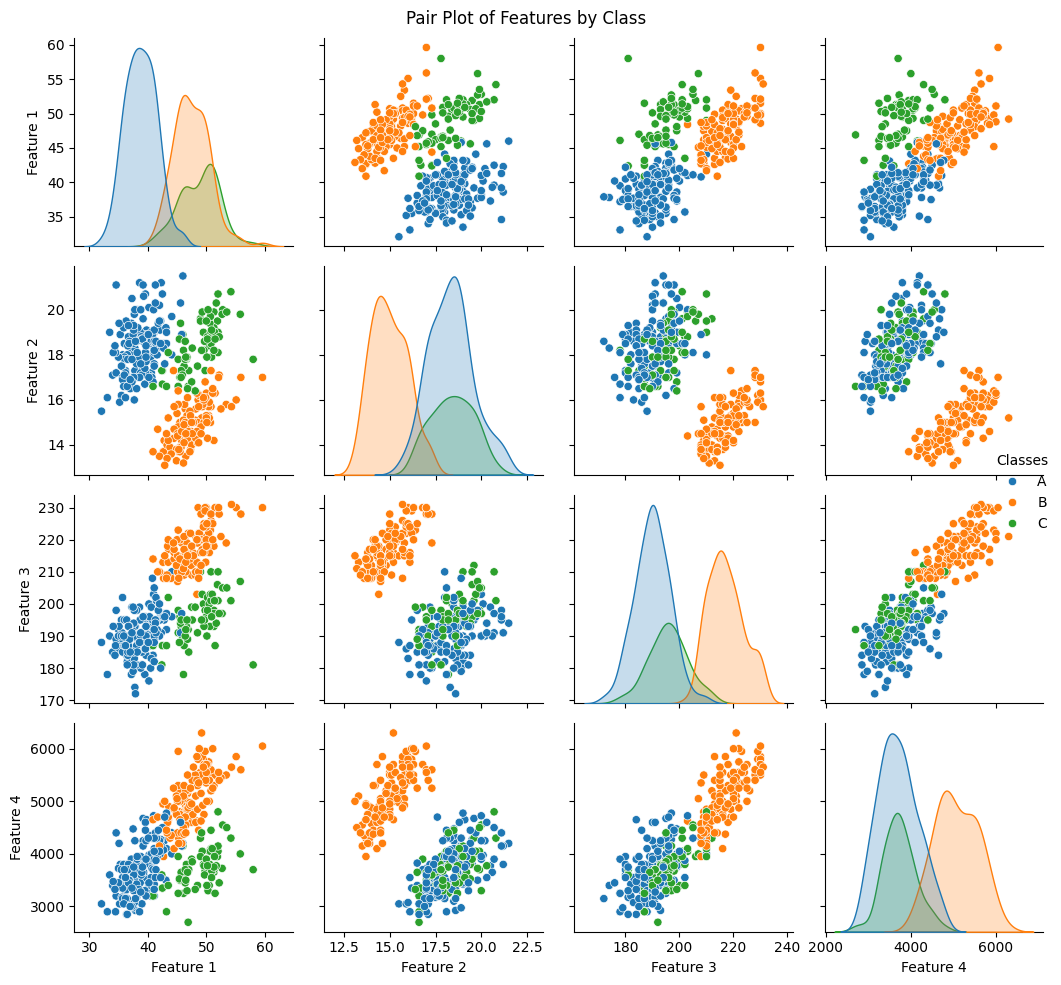

In [66]:
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']
sns.pairplot(data, vars=features, hue='Classes')
plt.suptitle('Pair Plot of Features by Class')
plt.tight_layout()
plt.show()